In [52]:
# python version utilised Python 3.10.6

%pip install plotly==5.14.1 -q
%pip install jupyter-dash==0.4.2 -q
%pip install yfinance==0.2.18 -q
%pip install numpy==1.21.5
%pip install numpy==1.21.5
%pip install scipy==1.9.3
%pip install cvxopt==1.3.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas
import pandas as pd

import numpy
import numpy as np

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from datetime import datetime, date

In [54]:
def remove_dot(input: str) -> str:
    if '.' in input:
        return input.split('.')[0]
    else:
        return input

# Download the dataset from Yahoo Finance. If you prefer, you can choose another source.

# Assets

Why i chose nifty 50 stocks

In [68]:
assets = {
    "KOTAKBANK.NS": "Kotak Mahindra Bank Limited",
    "BAJAJFINSV.NS": "Bajaj Finserv Ltd.",
    "TATASTEEL.NS": "Tata Steel Limited",
    "HEROMOTOCO.NS": "Hero MotoCorp Limited",
    "RELIANCE.NS": "Reliance Industries Limited",
    "ICICIBANK.NS": "ICICI Bank Limited",
    "TATACONSUM.NS": "Tata Consumer Products Limited",
    "COALINDIA.NS": "Coal India Limited",
    "TITAN.NS": "Titan Company Limited",
    "ITC.NS": "ITC Limited",
    "MARUTI.NS": "Maruti Suzuki India Limited",
    "TCS.NS": "Tata Consultancy Services Limited",
    "INDUSINDBK.NS": "IndusInd Bank Limited",
    "ULTRACEMCO.NS": "UltraTech Cement Limited",
    "WIPRO.NS": "Wipro Limited",
    "BAJFINANCE.NS": "Bajaj Finance Limited",
    "ADANIENT.NS": "Adani Enterprises Limited",
    "LT.NS": "Larsen & Toubro Limited",
    "ONGC.NS": "Oil and Natural Gas Corporation Limited",
    "APOLLOHOSP.NS": "Apollo Hospitals Enterprise Limited",
    "NESTLEIND.NS": "Nestlé India Limited",
    "HINDALCO.NS": "Hindalco Industries Limited",
    "TECHM.NS": "Tech Mahindra Limited",
    "CIPLA.NS": "Cipla Limited",
    "BRITANNIA.NS": "Britannia Industries Limited",
    "BHARTIARTL.NS": "Bharti Airtel Limited",
    "HDFCLIFE.NS": "HDFC Life Insurance Company Limited",
    "BAJAJ-AUTO.NS": "Bajaj Auto Limited",
    "NTPC.NS": "NTPC Limited"
}



assets_list = [key.replace('.NS', '') for key in list(assets.keys())]
print(assets_list)

['KOTAKBANK', 'BAJAJFINSV', 'TATASTEEL', 'HEROMOTOCO', 'RELIANCE', 'ICICIBANK', 'TATACONSUM', 'COALINDIA', 'TITAN', 'ITC', 'MARUTI', 'TCS', 'INDUSINDBK', 'ULTRACEMCO', 'WIPRO', 'BAJFINANCE', 'ADANIENT', 'LT', 'ONGC', 'APOLLOHOSP', 'NESTLEIND', 'HINDALCO', 'TECHM', 'CIPLA', 'BRITANNIA', 'BHARTIARTL', 'HDFCLIFE', 'BAJAJ-AUTO', 'NTPC']


downloading data from the  yfinance, 
tell them to download from reliable sources

In [56]:

import yfinance as yf

historical_data = pd.DataFrame()
assets_tickers = list(assets.keys())

for tick in assets_tickers:
    ticker = yf.Ticker(tick)
    historical_data[remove_dot(tick)] = yf.download(ticker.ticker, start="2018-01-01", end="2023-01-01")['Adj Close']
    
display(historical_data.head(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,997.804932,516.265076,27.919813,3078.663818,881.918274,301.323151,300.194244,160.815323,829.715881,214.631424,...,1182.671509,7227.839844,262.305786,431.980133,597.255249,2101.571045,470.917511,385.694092,2810.548096,108.863426
2018-01-02,1001.047974,509.202667,28.194296,3074.352539,883.275391,300.740509,298.515289,162.865829,822.610596,213.363113,...,1172.246704,7228.162598,263.031342,441.296326,593.641418,2065.112793,460.792633,391.484711,2815.247314,110.312469
2018-01-03,997.954590,509.038025,28.412718,3083.673340,886.813721,305.887177,298.563293,163.951416,833.463196,213.690399,...,1157.052002,7224.991699,267.481323,446.018860,592.664734,2076.156738,462.264496,381.734711,2769.362793,109.171738
2018-01-04,998.253967,505.354584,29.390802,3070.288086,892.145386,305.595856,299.570618,167.539856,869.087036,214.017731,...,1140.923218,7233.400879,270.673645,448.680573,602.382935,2051.961914,466.546448,394.949158,2789.356689,109.202568
2018-01-05,1000.898315,511.807983,29.794792,3075.009521,895.005188,303.847931,300.242218,168.112793,885.439087,215.122406,...,1176.525024,7221.912598,267.384583,451.170624,600.820312,2059.812500,481.711395,402.867981,2802.515869,109.449219
2018-01-08,1003.941711,521.196289,29.719408,3109.581055,900.143066,305.061798,304.703400,173.359711,901.401550,217.331726,...,1161.182739,7299.491211,267.142700,460.486877,600.722534,2081.833740,460.614227,417.814667,2799.012451,109.541725
2018-01-09,1007.583923,514.722839,29.856649,3078.951660,912.163696,303.556610,302.496735,183.371063,908.068970,221.382126,...,1152.970703,7150.673340,262.644379,458.383209,601.259705,2058.859375,454.771210,431.078613,2771.456055,108.955917
2018-01-10,1000.099976,519.030151,29.877909,3068.645752,913.520874,302.973938,301.345520,185.934235,893.128174,220.441132,...,1152.774170,7212.628418,260.032440,465.466949,605.313110,2073.407227,451.738220,424.892059,2740.609863,107.260239
2018-01-11,1015.466980,513.724670,29.804459,3042.983643,909.061584,300.546295,300.577942,185.813599,882.713745,220.768433,...,1153.020142,7238.042480,259.016693,473.709930,598.085449,2094.164062,459.186920,442.164917,2728.647705,106.982765


Log retruns, why are u choosing log returns

In [57]:
# calculate historical log returns
hist_return = np.log(historical_data / historical_data.shift())
hist_return = hist_return.dropna()
display(hist_return.head(10))

,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.003245,-0.013774,0.009783,-0.001401,0.001538,-0.001935,-0.005609,0.012670,-0.008600,-0.005927,...,-0.008854,0.000045,0.002762,0.021337,-0.006069,-0.017500,-0.021735,0.014902,0.001671,0.013223
2018-01-03,-0.003095,-0.000323,0.007717,0.003027,0.003998,0.016969,0.000161,0.006643,0.013107,0.001533,...,-0.013047,-0.000439,0.016777,0.010645,-0.001647,0.005334,0.003189,-0.025221,-0.016433,-0.010395
2018-01-04,0.000300,-0.007262,0.033845,-0.004350,0.005994,-0.000953,0.003368,0.021651,0.041854,0.001531,...,-0.014038,0.001163,0.011864,0.005950,0.016264,-0.011722,0.009220,0.034031,0.007194,0.000282
2018-01-05,0.002645,0.012689,0.013652,0.001537,0.003200,-0.005736,0.002239,0.003414,0.018640,0.005148,...,0.030727,-0.001589,-0.012226,0.005534,-0.002597,0.003819,0.031988,0.019852,0.004707,0.002256
2018-01-08,0.003036,0.018177,-0.002533,0.011180,0.005724,0.003987,0.014749,0.030734,0.017867,0.010218,...,-0.013126,0.010685,-0.000905,0.020439,-0.000163,0.010634,-0.044784,0.036429,-0.001251,0.000845
2018-01-09,0.003621,-0.012498,0.004607,-0.009899,0.013266,-0.004946,-0.007268,0.056143,0.007370,0.018465,...,-0.007097,-0.020598,-0.016982,-0.004579,0.000894,-0.011097,-0.012766,0.031253,-0.009894,-0.005362
2018-01-10,-0.007455,0.008333,0.000712,-0.003353,0.001487,-0.001921,-0.003813,0.013881,-0.016590,-0.004260,...,-0.000170,0.008627,-0.009995,0.015336,0.006719,0.007041,-0.006692,-0.014455,-0.011192,-0.015685
2018-01-11,0.015249,-0.010275,-0.002461,-0.008398,-0.004893,-0.008045,-0.002550,-0.000649,-0.011729,0.001484,...,0.000213,0.003517,-0.003914,0.017554,-0.012012,0.009961,0.016355,0.039848,-0.004374,-0.002590
2018-01-12,0.005585,-0.017465,-0.000908,-0.004951,0.011925,0.026150,0.038969,0.002917,-0.003424,-0.008374,...,-0.007749,-0.010860,0.004100,-0.001724,-0.000408,-0.002810,-0.010153,0.020496,-0.005668,-0.005780


In [58]:
# find historical mean, covriance, and correlation
hist_mean = hist_return.mean(axis=0).to_frame()
hist_mean.columns = ['mu']
hist_cov = hist_return.cov()
hist_corr = hist_return.corr()
display(hist_mean.transpose())
display(hist_cov)
display(hist_corr)

,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
mu,0.00049,0.000889,0.00113,-0.000116,0.000859,0.000878,0.00076,0.000253,0.000924,0.000339,...,0.001077,0.000808,0.000478,0.000693,0.000477,0.000567,0.000435,0.000311,0.000204,0.000323


,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
KOTAKBANK,0.000366,0.000239,0.000125,0.000143,0.000145,0.000218,0.000140,0.000077,0.000148,0.000103,...,0.000124,0.000082,0.000168,0.000100,0.000058,0.000108,0.000113,0.000158,0.000130,0.000097
BAJAJFINSV,0.000239,0.000585,0.000252,0.000191,0.000193,0.000300,0.000216,0.000139,0.000202,0.000147,...,0.000184,0.000105,0.000285,0.000162,0.000066,0.000152,0.000180,0.000201,0.000171,0.000138
TATASTEEL,0.000125,0.000252,0.001043,0.000147,0.000183,0.000250,0.000190,0.000201,0.000165,0.000139,...,0.000143,0.000082,0.000456,0.000113,0.000087,0.000103,0.000145,0.000154,0.000126,0.000153
HEROMOTOCO,0.000143,0.000191,0.000147,0.000393,0.000139,0.000160,0.000134,0.000109,0.000148,0.000097,...,0.000129,0.000081,0.000186,0.000100,0.000070,0.000113,0.000120,0.000154,0.000217,0.000096
RELIANCE,0.000145,0.000193,0.000183,0.000139,0.000397,0.000176,0.000151,0.000129,0.000141,0.000095,...,0.000109,0.000092,0.000207,0.000133,0.000058,0.000110,0.000123,0.000157,0.000126,0.000090
ICICIBANK,0.000218,0.000300,0.000250,0.000160,0.000176,0.000491,0.000171,0.000134,0.000185,0.000128,...,0.000139,0.000092,0.000281,0.000124,0.000065,0.000112,0.000152,0.000178,0.000146,0.000130
TATACONSUM,0.000140,0.000216,0.000190,0.000134,0.000151,0.000171,0.000430,0.000101,0.000151,0.000105,...,0.000154,0.000108,0.000210,0.000133,0.000098,0.000142,0.000136,0.000163,0.000118,0.000113
COALINDIA,0.000077,0.000139,0.000201,0.000109,0.000129,0.000134,0.000101,0.000408,0.000103,0.000104,...,0.000080,0.000043,0.000241,0.000097,0.000060,0.000056,0.000078,0.000078,0.000083,0.000175
TITAN,0.000148,0.000202,0.000165,0.000148,0.000141,0.000185,0.000151,0.000103,0.000397,0.000096,...,0.000118,0.000108,0.000197,0.000108,0.000058,0.000111,0.000108,0.000131,0.000136,0.000104
ITC,0.000103,0.000147,0.000139,0.000097,0.000095,0.000128,0.000105,0.000104,0.000096,0.000283,...,0.000079,0.000049,0.000153,0.000078,0.000059,0.000075,0.000095,0.000096,0.000086,0.000096


,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
KOTAKBANK,1.000000,0.515615,0.202803,0.377880,0.380720,0.514915,0.353866,0.200664,0.387205,0.320271,...,0.274286,0.281236,0.326672,0.261255,0.173039,0.347992,0.278192,0.413016,0.395724,0.290370
BAJAJFINSV,0.515615,1.000000,0.322781,0.398093,0.399643,0.559660,0.430776,0.285650,0.419101,0.360903,...,0.321968,0.284710,0.437101,0.332896,0.154941,0.387488,0.351728,0.414115,0.410707,0.325246
TATASTEEL,0.202803,0.322781,1.000000,0.230093,0.283705,0.348598,0.282980,0.308275,0.256650,0.256291,...,0.186587,0.165237,0.524091,0.174490,0.153365,0.197565,0.212321,0.238347,0.227367,0.269952
HEROMOTOCO,0.377880,0.398093,0.230093,1.000000,0.352028,0.364988,0.326371,0.271417,0.375241,0.289581,...,0.275139,0.267344,0.347757,0.252031,0.200140,0.350466,0.285655,0.386398,0.636712,0.277578
RELIANCE,0.380720,0.399643,0.283705,0.352028,1.000000,0.399683,0.364367,0.319665,0.355534,0.284811,...,0.231370,0.300990,0.385076,0.332265,0.164642,0.340338,0.290927,0.392312,0.366206,0.257276
ICICIBANK,0.514915,0.559660,0.348598,0.364988,0.399683,1.000000,0.372491,0.298574,0.418916,0.342559,...,0.265509,0.270362,0.471197,0.278442,0.167631,0.312219,0.324715,0.400665,0.382173,0.334921
TATACONSUM,0.353866,0.430776,0.282980,0.326371,0.364367,0.372491,1.000000,0.241495,0.364461,0.299622,...,0.313380,0.340504,0.375667,0.320434,0.268960,0.422102,0.309282,0.391057,0.331420,0.312608
COALINDIA,0.200664,0.285650,0.308275,0.271417,0.319665,0.298574,0.241495,1.000000,0.255766,0.306260,...,0.166549,0.138890,0.443755,0.239310,0.169408,0.169840,0.183358,0.192857,0.239941,0.496177
TITAN,0.387205,0.419101,0.256650,0.375241,0.355534,0.418916,0.364461,0.255766,1.000000,0.287016,...,0.249393,0.355500,0.366227,0.269280,0.165845,0.344949,0.256345,0.327442,0.397823,0.297929
ITC,0.320271,0.360903,0.256291,0.289581,0.284811,0.342559,0.299622,0.306260,0.287016,1.000000,...,0.199034,0.188705,0.337463,0.231433,0.199892,0.276626,0.268306,0.285770,0.296736,0.327066


In [59]:
# construct random portfolios
n_portfolios = 5000
#set up array to hold results
port_returns = np.zeros(n_portfolios)
port_stdevs = np.zeros(n_portfolios)


In [60]:
for i in range(n_portfolios):
    w = np.random.rand(len(assets))        # random weights
    w = w / sum(w)                         # weights sum to 1
    port_return = np.dot(w.T, hist_mean.values) * 250         # annualize; 250 business days
    port_stdev = np.sqrt(np.dot(w.T, np.dot(hist_cov, w))) * np.sqrt(250)  # annualize; 250 business days
    port_returns[i] = port_return
    port_stdevs[i] = port_stdev

# Plotting Return and Standard Deviation of Randomly Generated Portfolios

In [61]:
import plotly.graph_objects as go

# create scatter plot
fig = go.Figure(data=go.Scatter(x=port_stdevs, y=port_returns, mode='markers', marker=dict(symbol='circle', size=6)))

# add axis labels and title
fig.update_layout(xaxis_title='Expected Volatility', yaxis_title='Expected Return', title='Return and Standard Deviation of Randomly Generated Portfolios')

# show plot
fig.show()


In [62]:
# Global Minimum Variance (GMV) -- closed form
hist_cov_inv = - np.linalg.inv(hist_cov)
one_vec = np.ones(len(assets))
w_gmv = np.dot(hist_cov_inv, one_vec) / (np.dot(np.transpose(one_vec), np.dot(hist_cov_inv, one_vec)))
w_gmv_df = pd.DataFrame(data = w_gmv).transpose()
w_gmv_df.columns = assets
stdev_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(hist_cov, w_gmv))) * np.sqrt(250)
display(w_gmv_df)
display(stdev_gmv)

,KOTAKBANK.NS,BAJAJFINSV.NS,TATASTEEL.NS,HEROMOTOCO.NS,RELIANCE.NS,ICICIBANK.NS,TATACONSUM.NS,COALINDIA.NS,TITAN.NS,ITC.NS,...,APOLLOHOSP.NS,NESTLEIND.NS,HINDALCO.NS,TECHM.NS,CIPLA.NS,BRITANNIA.NS,BHARTIARTL.NS,HDFCLIFE.NS,BAJAJ-AUTO.NS,NTPC.NS
0,0.053473,-0.030503,0.012093,-0.011525,0.012467,0.008553,-0.020842,0.088923,0.015752,0.119364,...,0.029489,0.161319,-0.094053,-0.021024,0.12714,0.09228,0.069121,0.027352,0.104,0.110513


0.14680097358353017

In [63]:
# Global Minimum Variance (GMV) -- numerical
P = matrix(hist_cov.values)
q = matrix(np.zeros((len(assets), 1)))
A = matrix(1.0, (1, len(assets)))
b = matrix(1.0)
w_gmv_v2 = np.array(solvers.qp(P, q, A=A, b=b)['x'])
w_gmv_df_v2 = pd.DataFrame(w_gmv_v2).transpose()
w_gmv_df_v2.columns = assets
stdev_gmv_v2 = np.sqrt(np.dot(w_gmv_v2.T, np.dot(hist_cov, w_gmv_v2))) * np.sqrt(250)
display(w_gmv_df_v2)
display(stdev_gmv_v2.item())

,KOTAKBANK.NS,BAJAJFINSV.NS,TATASTEEL.NS,HEROMOTOCO.NS,RELIANCE.NS,ICICIBANK.NS,TATACONSUM.NS,COALINDIA.NS,TITAN.NS,ITC.NS,...,APOLLOHOSP.NS,NESTLEIND.NS,HINDALCO.NS,TECHM.NS,CIPLA.NS,BRITANNIA.NS,BHARTIARTL.NS,HDFCLIFE.NS,BAJAJ-AUTO.NS,NTPC.NS
0,0.053473,-0.030503,0.012093,-0.011525,0.012467,0.008553,-0.020842,0.088923,0.015752,0.119364,...,0.029489,0.161319,-0.094053,-0.021024,0.12714,0.09228,0.069121,0.027352,0.104,0.110513


0.14680097358353023

In [65]:
# Maximum return -- closed form
mu_o = hist_mean.max(axis=0).item()   # MCD
A = np.matrix([[
    np.dot(hist_mean.T,np.dot(hist_cov_inv,hist_mean)).item(),
                np.dot(hist_mean.T,np.dot(hist_cov_inv,one_vec)).item()],
               [np.dot(hist_mean.T,np.dot(hist_cov_inv,one_vec)).item(),
                np.dot(one_vec.T,np.dot(hist_cov_inv,one_vec)).item()]])
B = np.hstack([np.array(hist_mean),one_vec.reshape(len(assets),1)])
y = np.matrix([mu_o, 1]).T
w_max_ret = np.dot(np.dot(np.dot(hist_cov_inv, B),  np.linalg.inv(A)),y)
w_max_ret_df = pd.DataFrame(w_max_ret).T
w_max_ret_df.columns = assets
display(w_max_ret_df)

,KOTAKBANK.NS,BAJAJFINSV.NS,TATASTEEL.NS,HEROMOTOCO.NS,RELIANCE.NS,ICICIBANK.NS,TATACONSUM.NS,COALINDIA.NS,TITAN.NS,ITC.NS,...,APOLLOHOSP.NS,NESTLEIND.NS,HINDALCO.NS,TECHM.NS,CIPLA.NS,BRITANNIA.NS,BHARTIARTL.NS,HDFCLIFE.NS,BAJAJ-AUTO.NS,NTPC.NS
0,-0.027314,-0.015372,0.111946,-0.247036,0.137394,0.189416,-0.021267,0.004893,0.222834,0.000773,...,0.15354,0.435826,-0.169876,-0.008866,0.116586,0.044959,0.041842,-0.119389,0.121593,0.083648


In [79]:
# Maximum return -- numerical
P = matrix(hist_cov.values)
q = matrix(np.zeros((len(assets), 1)))
A = matrix(np.hstack([np.array(hist_mean),one_vec.reshape(len(assets),1)]).transpose())
b = matrix([mu_o,1])
w_max_ret_v2 = np.array(solvers.qp(P, q, A=A, b=b)['x'])
w_max_ret_df_v2 = pd.DataFrame(w_max_ret_v2).transpose()
w_max_ret_df_v2.columns = assets
display(w_max_ret_df_v2)

,KOTAKBANK.NS,BAJAJFINSV.NS,TATASTEEL.NS,HEROMOTOCO.NS,RELIANCE.NS,ICICIBANK.NS,TATACONSUM.NS,COALINDIA.NS,TITAN.NS,ITC.NS,...,APOLLOHOSP.NS,NESTLEIND.NS,HINDALCO.NS,TECHM.NS,CIPLA.NS,BRITANNIA.NS,BHARTIARTL.NS,HDFCLIFE.NS,BAJAJ-AUTO.NS,NTPC.NS
0,-0.027314,-0.015372,0.111946,-0.247036,0.137394,0.189416,-0.021267,0.004893,0.222834,0.000773,...,0.15354,0.435826,-0.169876,-0.008866,0.116586,0.044959,0.041842,-0.119389,0.121593,0.083648


In [89]:
# efficient frontier
N = 100
ef_left = (min(hist_mean.values)).item()          # minimum return
ef_right = (max(hist_mean.values)).item()          # maximum return
target_returns = np.linspace(ef_left, ef_right, N)         # N target returns
optimal_weights = [ solvers.qp(P, q, A=A, b=matrix([t,1]))['x'] for t in target_returns ]    # QP solver
ef_returns = [ (np.dot(w.T, hist_mean.values)*250).item() for w in optimal_weights ]         # annualized
ef_risks = [ (np.sqrt(np.dot(w.T, np.dot(hist_cov, w)) * 250)).item() for w in optimal_weights ]

print(optimal_weights) 

[<29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matrix, tc='d'>, <29x1 matr

/tmp/ipykernel_369850/3582662544.py:4: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "y-o" (-> color='y'). The keyword argument will take precedence.



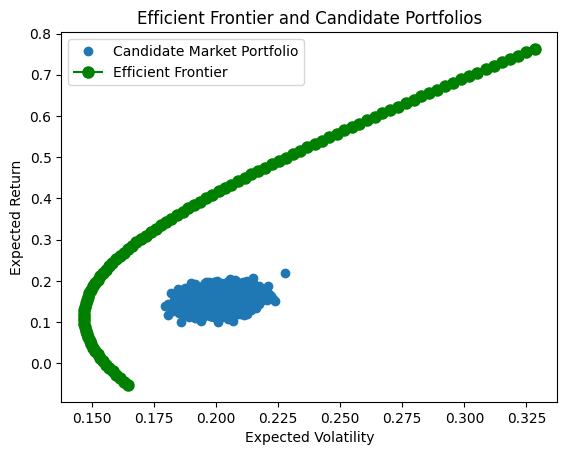

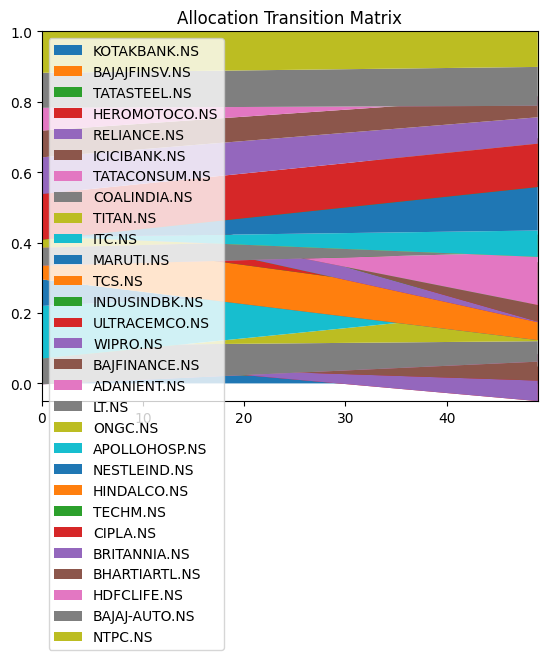

In [85]:
import matplotlib.pyplot as plt

plt.plot(port_stdevs, port_returns, 'o', markersize=6, label='Candidate Market Portfolio')
plt.plot(ef_risks, ef_returns, 'y-o', color='green', markersize=8, label='Efficient Frontier')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Candidate Portfolios')
plt.legend(loc='best')
plt.show()

transition_data = pd.DataFrame(optimal_weights)
transition_data.columns = assets
plt.stackplot(range(50), transition_data.iloc[:50,:].T, labels=assets)             # the other half has negative weights
plt.legend(loc='upper left')
plt.margins(0, 0)
plt.title('Allocation Transition Matrix')
plt.show()


In [95]:
# Maximum sharpe -- closed form
r_f = 0.01
w_sharpe = np.dot(hist_cov_inv, hist_mean.values-r_f/250) / np.dot(one_vec, np.dot(hist_cov_inv, hist_mean.values-r_f/250))
w_sharpe_df = pd.DataFrame(w_sharpe).T
w_sharpe_df.columns = assets_list
display(w_sharpe_df)
display(mu_sharpe := np.dot(w_sharpe.T, hist_mean.values) * 250)
display(stdev_sharpe := np.sqrt(np.dot(w_sharpe.T, np.dot(hist_cov, w_sharpe))) * np.sqrt(250))
display(sharpe_ratio := (mu_sharpe-r_f)/stdev_sharpe)

,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
0,-0.07439,-0.006556,0.170133,-0.384273,0.210191,0.294809,-0.021515,-0.044073,0.343505,-0.068333,...,0.225827,0.595787,-0.21406,-0.001782,0.110436,0.017384,0.025946,-0.204898,0.131844,0.067993


array([[1.1414256]])

array([[0.48748308]])

array([[2.32095357]])

In [99]:
from scipy.optimize import minimize

fun = lambda w: -1 * np.dot(w.T, hist_mean.values*250-r_f) / np.sqrt(np.dot(w.T, np.dot(hist_cov*250, w)))
cons = ({'type': 'eq', 'fun': lambda w:  np.dot(w.T, one_vec)-1})
res = minimize(fun, w_gmv, method='SLSQP', constraints=cons)
w_sharpe_v2 = res['x']
w_sharpe_v2_df = pd.DataFrame(w_sharpe_v2).T
w_sharpe_v2_df.columns = assets_list
display(w_sharpe_v2_df)
display(mu_sharpe_v2 := np.dot(w_sharpe_v2.T, hist_mean.values) * 250)
display(stdev_sharpe_v2 := np.sqrt(np.dot(w_sharpe_v2.T, np.dot(hist_cov, w_sharpe_v2))) * np.sqrt(250))
display(sharpe_ratio_v2 := (mu_sharpe-r_f)/stdev_sharpe)

,KOTAKBANK,BAJAJFINSV,TATASTEEL,HEROMOTOCO,RELIANCE,ICICIBANK,TATACONSUM,COALINDIA,TITAN,ITC,...,APOLLOHOSP,NESTLEIND,HINDALCO,TECHM,CIPLA,BRITANNIA,BHARTIARTL,HDFCLIFE,BAJAJ-AUTO,NTPC
0,-0.074489,-0.006935,0.170176,-0.384176,0.210164,0.295139,-0.021505,-0.044231,0.343462,-0.06825,...,0.225809,0.595678,-0.21424,-0.001632,0.110314,0.017675,0.025875,-0.205057,0.131719,0.068368


array([1.14154704])

0.48753544619804606

array([[2.32095357]])